# Step 1: Importing packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load Dataset

In [15]:
df = pd.read_csv("churn.csv")

In [16]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [17]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


#Step 3: VISUALIZATION

Target Variable Distribution

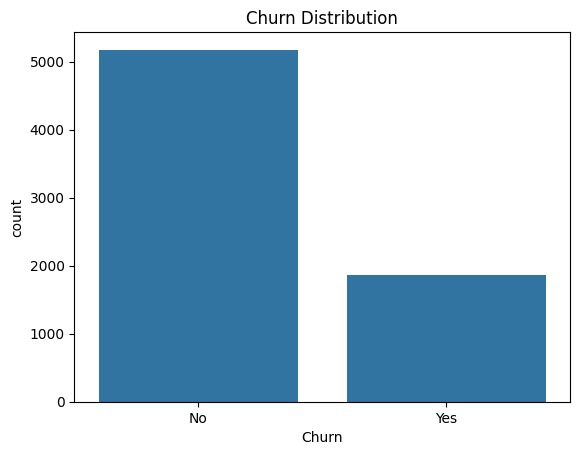

,proportion
Churn,
No,73.463013
Yes,26.536987


In [18]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True) * 100

Correlation Heatmap(Numerical Features)

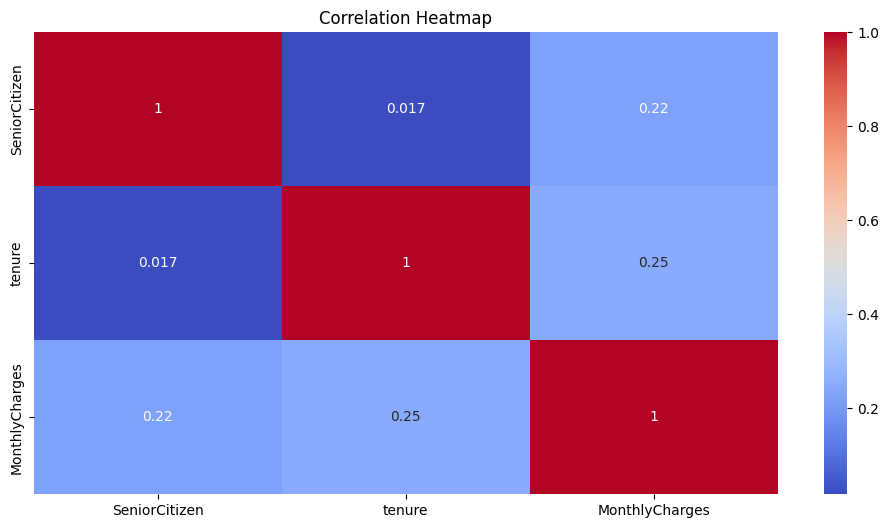

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Numerical Distribution

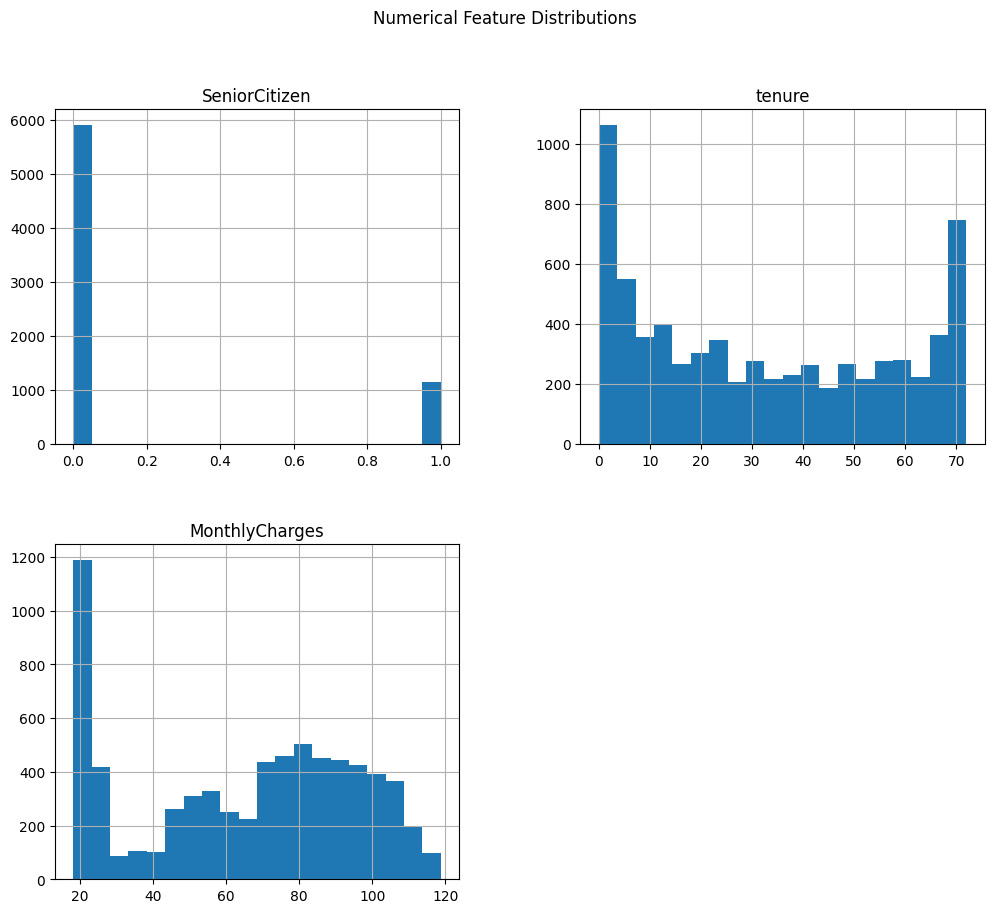

In [20]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Step 4: Data Preprocessing

Perform data preprocessing tasks such as handling missing values, encoding categorical variables, and feature scaling:

In [21]:
df.shape

(7043, 21)

In [22]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Keeping important columns
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract', 'TotalCharges', 'Churn']

In [23]:
# Define the columns to keep
columns_to_keep = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract', 'TotalCharges', 'Churn']
# Select only the specified columns
df = df[columns_to_keep]

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,Month-to-month,29.85,No
1,Male,0,No,No,34,Yes,No,One year,1889.5,No
2,Male,0,No,No,2,Yes,No,Month-to-month,108.15,Yes
3,Male,0,No,No,45,No,No phone service,One year,1840.75,No
4,Female,0,No,No,2,Yes,No,Month-to-month,151.65,Yes


# Encode binary variables (e.g., Yes/No columns)
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [25]:
#use label encoder
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# List of columns to label encode
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract', 'Churn']
# Apply label encoding to each column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,29.85,0
1,1,0,0,0,34,1,0,1,1889.5,0
2,1,0,0,0,2,1,0,0,108.15,1
3,1,0,0,0,45,0,1,1,1840.75,0
4,0,0,0,0,2,1,0,0,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,1990.5,0
7039,0,0,1,1,72,1,2,1,7362.9,0
7040,0,0,1,1,11,0,1,0,346.45,0
7041,1,1,1,0,4,1,2,0,306.6,1


# Encoding Categorical and Binary Variables

In [27]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'Churn']
df[binary_columns] = df[binary_columns].replace({'Yes':1,'No':0})

In [28]:
df[['MultipleLines','Contract']] = df[['MultipleLines','Contract']].replace({'Yes':1,'No':0,'No phone service':2,"Month-to-month":1,'One year':2,'Two year':3})

In [29]:
df['gender'] = df['gender'].replace({'Male':1,'Female':0})

# Split the dataset into training and testing sets

In [30]:
# Split the dataset into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Convert 'TotalCharges' column to float, and handle errors='coerce' to replace non-numeric values with NaN
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

In [33]:
# Replace missing values in the 'TotalCharges' column with the mean of the column
X_train['TotalCharges'].fillna(X_train['TotalCharges'].mean(), inplace=True)

In [34]:
X_test['TotalCharges'].fillna(X_test['TotalCharges'].mean(), inplace=True)

# Standardize features (optional but often beneficial for logistic regression)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression

In [36]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [37]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

# Accuracy score

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.7757274662881476

# save model

In [40]:
import joblib
joblib.dump(lg,open("logistic_model.joblib",'wb'))

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,29.85,0
1,1,0,0,0,34,1,0,1,1889.5,0
2,1,0,0,0,2,1,0,0,108.15,1
3,1,0,0,0,45,0,1,1,1840.75,0
4,0,0,0,0,2,1,0,0,151.65,1


# Classification system

In [42]:
def prediction(gender,Seniorcitizen,Partner,Dependents,tenure,Phoneservice,multiline,contact,totalcharge):
    data = {
    'gender': [gender],
    'SeniorCitizen': [Dependents],
    'Partner': [Partner],
    'Dependents': [Phoneservice],
    'tenure': [tenure],
    'PhoneService': [Phoneservice],
    'MultipleLines': [multiline],
    'Contract': [contact],
    'TotalCharges': [totalcharge]
    }
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)


    # Encode the categorical columns
    categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract']
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    df = scaler.fit_transform(df)

    result = lg.predict(df).reshape(1,-1)
    return result[0]

In [43]:
gender = "Female"
Seniorcitizen = "No"
Partner = "Yes"
Dependents = "No"
tenure = 1
Phoneservice="No"
multiline = "No phone service"
contact="Month-to-month"
totalcharge = 29.85
result = prediction(gender,Seniorcitizen,Partner,Dependents,tenure,Phoneservice,multiline,contact,totalcharge)

if result==1:
    print('churn')
else:
    print('not churn')

not churn


In [44]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,29.85,0
1,1,0,0,0,34,1,0,1,1889.5,0
2,1,0,0,0,2,1,0,0,108.15,1
3,1,0,0,0,45,0,1,1,1840.75,0
4,0,0,0,0,2,1,0,0,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,1990.5,0
7039,0,0,1,1,72,1,2,1,7362.9,0
7040,0,0,1,1,11,0,1,0,346.45,0
7041,1,1,1,0,4,1,2,0,306.6,1
